In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

ModuleNotFoundError: No module named 'tensorflow_hub'

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load a pre-trained MobileNet model from TensorFlow Hub
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4"
model = hub.KerasLayer(model_url)

# Load and preprocess an image

image_path ="image.jpg"
image = Image.open(image_path).resize((224, 224))
image = np.array(image) / 255.0  # Normalize to [0, 1]
image = image[np.newaxis, ...]  # Add batch dimension

# Make predictions
predictions = model(image)
predicted_class = np.argmax(predictions, axis=-1)

print(f"Predicted class: {predicted_class}")

Predicted class: [621]


In [13]:
# Load the pre-trained object detection model
model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
model = hub.load(model_url)

# Load and preprocess an image
image_path = "image.jpg"  # Replace with the path to your image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_resized = cv2.resize(image_rgb, (300, 300))
image_resized = np.expand_dims(image_resized, axis=0)

# Run object detection
result = model(image_resized)

# Extract detection results
boxes = result["detection_boxes"][0].numpy()
scores = result["detection_scores"][0].numpy()
classes = result["detection_classes"][0].numpy().astype(np.int32)

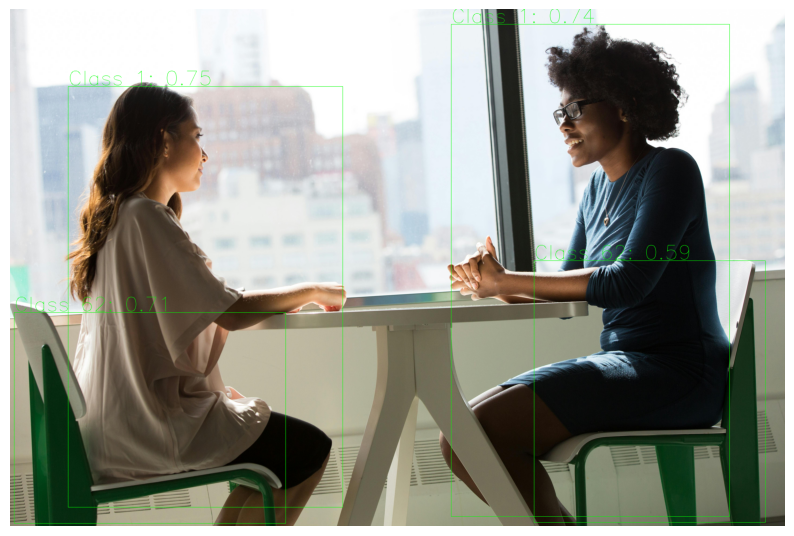

In [11]:
# Set a score threshold for displaying bounding boxes
score_threshold = 0.5

# Draw bounding boxes on the image
for i in range(len(boxes)):
    if scores[i] >= score_threshold:
        box = boxes[i]
        class_id = classes[i]
        
        # Convert normalized coordinates to pixel values
        height, width, _ = image.shape
        ymin, xmin, ymax, xmax = box
        (left, right, top, bottom) = (xmin * width, xmax * width, ymin * height, ymax * height)
        
        # Draw the bounding box
        cv2.rectangle(image, (int(left), int(top)), (int(right), int(bottom)), (0, 255, 0), 2)
        
        # Put the class label
        label = f'Class {class_id}: {scores[i]:.2f}'
        cv2.putText(image, label, (int(left), int(top) - 10), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 2)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()